In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format # Suprimo notación científica

datos = pd.read_csv("Entrenamieto_ECI_2020.csv")

datos.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00000,EUR,5272800.00000,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00000,EUR,48230.00000,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60000,USD,83865.60000,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50000,USD,7421881.50000,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50000,USD,13357192.50000,Closed Lost,Prod_Category_A_None


## Cantidad de Oportunidades vs Rango de Fechas

In [2]:
# No tiene nans
fechas = pd.to_datetime(datos['Opportunity_Created_Date'], errors='coerce')
fechas.hasnans

False

In [3]:
fechasdf = fechas.value_counts().to_frame().reset_index().rename(columns={'index':'Date', 'Opportunity_Created_Date':'Count'})
fechasdf

,Date,Count
0,2017-06-30,124
1,2016-01-22,107
2,2017-05-09,104
3,2016-05-18,99
4,2016-01-07,89
...,...,...
1091,2016-06-11,1
1092,2017-01-08,1
1093,2015-08-27,1
1094,2015-11-18,1


In [4]:
fechasdf['year'] = fechasdf['Date'].dt.year
fechasdf['month'] = fechasdf['Date'].dt.month
fechasdf

,Date,Count,year,month
0,2017-06-30,124,2017,6
1,2016-01-22,107,2016,1
2,2017-05-09,104,2017,5
3,2016-05-18,99,2016,5
4,2016-01-07,89,2016,1
...,...,...,...,...
1091,2016-06-11,1,2016,6
1092,2017-01-08,1,2017,1
1093,2015-08-27,1,2015,8
1094,2015-11-18,1,2015,11


In [5]:
for_heatmap = fechasdf.pivot_table(index='year', columns='month', values='Count', aggfunc='sum')
for_heatmap = for_heatmap.fillna(0)
for_heatmap

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2014,0.00000,0.00000,3.00000,0.00000,3.00000,2.00000,2.00000,2.00000,9.00000,7.00000,0.00000,12.00000
2015,9.00000,7.00000,12.00000,48.00000,55.00000,28.00000,47.00000,42.00000,236.00000,87.00000,146.00000,295.00000
2016,457.00000,373.00000,328.00000,304.00000,302.00000,272.00000,406.00000,276.00000,347.00000,424.00000,356.00000,510.00000
2017,452.00000,490.00000,714.00000,641.00000,758.00000,818.00000,440.00000,387.00000,535.00000,670.00000,508.00000,508.00000
2018,627.00000,402.00000,419.00000,391.00000,478.00000,389.00000,406.00000,339.00000,264.00000,392.00000,328.00000,183.00000


Text(105.0, 0.5, 'Año de Lanzamiento de la Oportunidad')

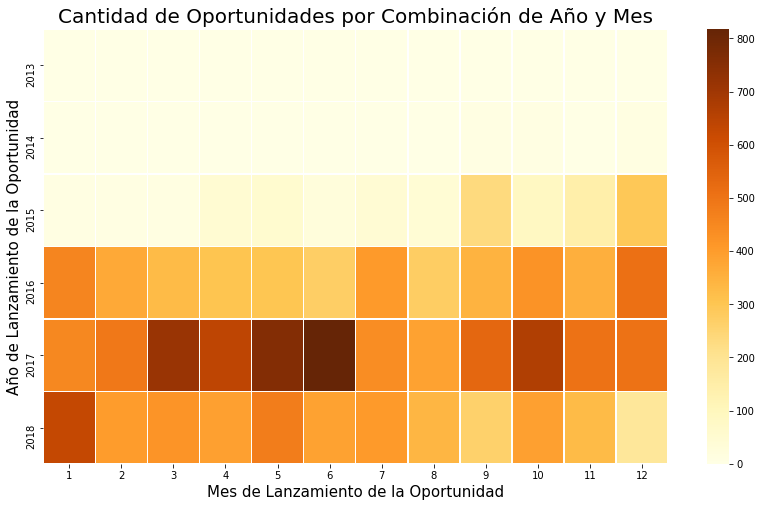

In [6]:
fig, ax = plt.subplots(figsize=(14,8))

hm = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlOrBr", ax=ax) # annot=True

hm.set_title("Cantidad de Oportunidades por Combinación de Año y Mes", fontsize=20)
hm.set_xlabel("Mes de Lanzamiento de la Oportunidad",fontsize=15)
hm.set_ylabel("Año de Lanzamiento de la Oportunidad", fontsize=15)

## Rango de Fechas vs Aceptación

In [7]:
# Primero filtro aquellos que no están en estado de éxito ni fracaso
stage = datos[(datos['Stage'] == 'Closed Won') | (datos['Stage'] == 'Closed Lost')]

lost_won = stage.groupby(['Opportunity_Created_Date', 'Stage']).agg({'Billing_Country':'count'}).unstack(1).fillna(0)
lost_won.columns = ['Closed Lost', 'Closed Won']
lost_won['Won Mean'] = lost_won['Closed Won'] / (lost_won['Closed Won'] + lost_won['Closed Lost'])
lost_won = lost_won.reset_index().rename(columns={'Opportunity_Created_Date':'Date'})
lost_won['Date'] = pd.to_datetime(lost_won['Date'])
lost_won

,Date,Closed Lost,Closed Won,Won Mean
0,2015-01-10,2.00000,0.00000,0.00000
1,2017-01-10,14.00000,14.00000,0.50000
2,2018-01-10,3.00000,32.00000,0.91429
3,2016-01-11,3.00000,1.00000,0.25000
4,2017-01-11,18.00000,7.00000,0.28000
...,...,...,...,...
1091,2016-09-08,5.00000,4.00000,0.44444
1092,2017-09-08,15.00000,19.00000,0.55882
1093,2018-09-08,1.00000,0.00000,0.00000
1094,2015-09-09,50.00000,1.00000,0.01961


In [8]:
lost_won['year'] = lost_won['Date'].dt.year
lost_won['month'] = lost_won['Date'].dt.month
lost_won

,Date,Closed Lost,Closed Won,Won Mean,year,month
0,2015-01-10,2.00000,0.00000,0.00000,2015,1
1,2017-01-10,14.00000,14.00000,0.50000,2017,1
2,2018-01-10,3.00000,32.00000,0.91429,2018,1
3,2016-01-11,3.00000,1.00000,0.25000,2016,1
4,2017-01-11,18.00000,7.00000,0.28000,2017,1
...,...,...,...,...,...,...
1091,2016-09-08,5.00000,4.00000,0.44444,2016,9
1092,2017-09-08,15.00000,19.00000,0.55882,2017,9
1093,2018-09-08,1.00000,0.00000,0.00000,2018,9
1094,2015-09-09,50.00000,1.00000,0.01961,2015,9


In [9]:
for_heatmap2 = lost_won.pivot_table(index='year', columns='month', values='Won Mean', aggfunc='mean')
for_heatmap2 = for_heatmap2.fillna(0)
for_heatmap2

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2014,0.00000,0.00000,0.00000,0.00000,0.50000,1.00000,0.00000,1.00000,0.00000,0.08333,0.00000,0.33333
2015,0.00000,0.12500,0.37500,0.14764,0.50000,0.13333,0.08791,0.25000,0.19826,0.23509,0.32609,0.50357
2016,0.43514,0.41696,0.45397,0.53244,0.41982,0.49669,0.57229,0.61575,0.53346,0.55811,0.59947,0.50413
2017,0.57904,0.62131,0.58844,0.62202,0.57896,0.59755,0.64839,0.60964,0.64629,0.63790,0.52539,0.55810
2018,0.60992,0.41415,0.54761,0.60664,0.52570,0.63034,0.52138,0.50568,0.65699,0.70398,0.67924,0.88512


Text(105.0, 0.5, 'Año de Lanzamiento de la Oportunidad')

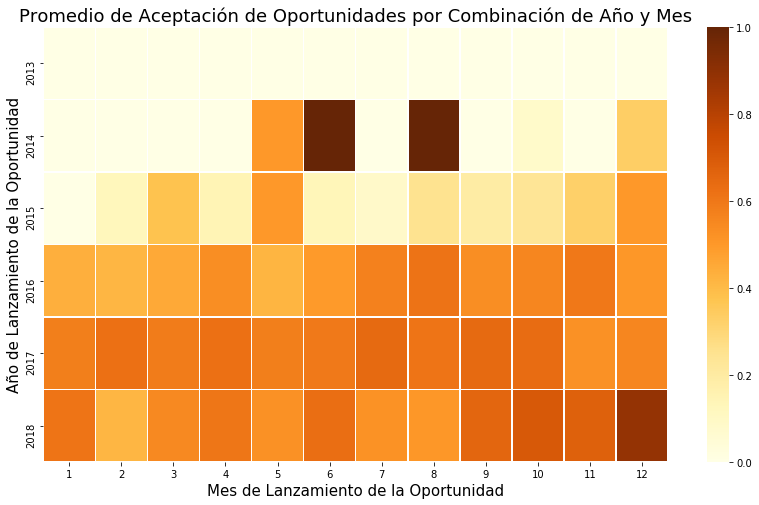

In [10]:
fig, ax = plt.subplots(figsize=(14,8))

hm = sns.heatmap(for_heatmap2, linewidths=.5, cmap="YlOrBr", ax=ax) # annot=True

hm.set_title("Promedio de Aceptación de Oportunidades por Combinación de Año y Mes", fontsize=18)
hm.set_xlabel("Mes de Lanzamiento de la Oportunidad",fontsize=15)
hm.set_ylabel("Año de Lanzamiento de la Oportunidad", fontsize=15)